In [7]:
## testing the correct solution by only checking eps 1 results
from scipy.optimize import minimize
import numpy as np
import math
import matplotlib.pyplot as plt
def e_fun(b,w,t):
    return math.exp(-(w*t+b)**2)
def eps1(x_guess_value, no_time_points, mu, nn):
    y_fun0=0
    y_fun1=0
    eps1=0
    realx=x_guess_value
    time_points=np.linspace(0,1,no_time_points+1)
    for t in time_points:

        #y_nn_list=[]
        #lOOPING OVER NN NEURONS FOR Y
        y_fun=0
        lhs=0
        for i in range(0,nn):
            a=x_guess_value[0]
            b=x_guess_value[1]
            w=x_guess_value[2]
            #print("a:",a)
            #print("b:",b)
            #print("w:",w)
            y_fun=y_fun+a*e_fun(b,w,t)
            lhs=lhs+(a*w**2*e_fun(b,w,t)*(-2 + 4*(w*t+b)**2))
            if len(x_guess_value)>3:
                idx_list = [0,1,2]
                x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]

        rhs = mu*math.sinh(mu*y_fun)
        diff2 = (lhs - rhs)**2   #error calculation
        #diff2 = (lhs - mu*(mu*y_fun))**2
        #y_nn_list.append(y_fun)
        x_guess_value=realx
        #print("diff2",diff2)
        #print("At Time", t,":-")
        #print("eps1: ", lhs)
        eps1=eps1+diff2
    #eps1=eps1/(no_time_points+1)
    return eps1/(no_time_points+1)
def eps2(x_guess_value, mu, nn):
    y_fun0=0
    y_fun1=0
    for i in range(0,nn):
        a=x_guess_value[0]
        b=x_guess_value[1]
        w=x_guess_value[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun0=y_fun0+a*e_fun(b,w,0)
        y_fun1=y_fun1+a*e_fun(b,w,1)
        if len(x_guess_value)>3:
            idx_list = [0,1,2]
            x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]
        #eps2=(1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    #print(eps1+eps2)
    #print("eps1 ",eps1)
    #print("eps2 ",eps2)
    return (1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    
#Global Variable
#x_guess_value=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[0.3,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
#x_guess_value=[0.936573221366534,0.6,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1        ,  1.7635845 , -0.56004043, -0.83785737,  1.60147995,0.67754925, -0.83786827,  1.60143412,  0.67761739, -0.83786803,1.60143884,  0.67761236]
#x_guess_value=[1.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]

x_guess_value=[1.8071326464831454, 1.7703949466392752, -0.7650858392126566, -2.256676644378014, 1.3033052613969818, 0.4852839942170539, 0.41722449851420407, 0.47058504353604785, -0.15463450364843234, 2.2798801455162834, 3.2410810564478045, -1.318692398363056]

no_time_points=29
nn=4
mu=1.75
#Printing eps1 and eps2

#Minimizing Section
x_guess_value=tuple(x_guess_value)
fun = lambda x_guess_value : eps1(x_guess_value,no_time_points, mu, nn)+eps2(x_guess_value, mu, nn)
bnds=((-7,7),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4))
res = minimize(fun, x_guess_value, bounds=bnds, method = 'SLSQP')
sol = res.x
print(list(sol))
print(res.fun)
#print(x_guess_value)
#print(eps1(x_guess_value,no_time_points, mu, nn))
#print(eps2(x_guess_value, mu, nn))
#epsiloncalc(x_guess_value, no_time_points, mu, nn)

[1.9021238144917452, 2.0885499362031026, -1.0609756706945612, -2.2353048704390854, 1.3226840004715401, 0.37379541803347394, 0.4039681806237086, 0.320364823795562, -0.4632476135510047, 2.568217217861064, 3.964190640703529, -2.0495717972220193]
0.0002824805333080152


[1.8071326464831454, 1.7703949466392752, -0.7650858392126566, -2.256676644378014, 1.3033052613969818, 0.4852839942170539, 0.41722449851420407, 0.47058504353604785, -0.15463450364843234, 2.2798801455162834, 3.2410810564478045, -1.318692398363056]
2.6610395716678986e-05
[1.8024272288812488, 1.7402305438649304, -0.741977452594889, -2.2580935825072723, 1.29007611606214, 0.4878170014882966, 0.4244365764229374, 0.4691770506909149, -0.16107510508646117, 2.2761954927171373, 3.2698588918860367, -1.2832567830405648]
4.4203844237111434e-06
[1.2958233666811887, 2.0421548622267918, -1.219377110806154, -2.3402105620134677, 1.4265067410008028, 0.42893701344561275, 0.29292167069093134, 0.2021945784548373, 0.5065311530877925, 3.9999999999999996, 4.0, -2.1725929415822036]
0.011457040509871178
[1.9110448799259874, 1.485286461973533, -0.4581026784453675, -2.185076099905277, 1.073134199189218, 0.4000971684234906, 0.6764787125109304, 0.5852729704737809, -0.19489098961550919, 2.2187922856894082, 3.4208887665

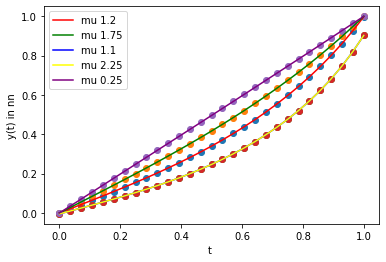

In [8]:
## testing the correct solution by plotting y(t) vs t and checking if the values lie between 0,1

#x=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,
#  0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]
x=[1.8071326464831454, 1.7703949466392752, -0.7650858392126566, -2.256676644378014, 1.3033052613969818, 0.4852839942170539, 0.41722449851420407, 0.47058504353604785, -0.15463450364843234, 2.2798801455162834, 3.2410810564478045, -1.318692398363056]

y_nn_list=[]
nn=4
time_points=np.linspace(0,1,no_time_points)
realx=x
for tp in time_points:
    y_fun=0
    for i in range(0,nn):
        a=x[0]
        b=x[1]
        w=x[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun=y_fun+a*e_fun(b,w,tp)
        if len(x)>3:
            idx_list = [0,1,2]
            x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
    y_nn_list.append(y_fun)
    x=realx



#######################################################################
#mu = 1.2
#######################################################################

## testing the correct solution by only checking eps 1 results
from scipy.optimize import minimize
import numpy as np
import math
import matplotlib.pyplot as plt
def e_fun(b,w,t):
    return math.exp(-(w*t+b)**2)
def eps1(x_guess_value, no_time_points, mu, nn):
    y_fun0=0
    y_fun1=0
    eps1=0
    realx=x_guess_value
    time_points=np.linspace(0,1,no_time_points+1)
    for t in time_points:

        #y_nn_list=[]
        #lOOPING OVER NN NEURONS FOR Y
        y_fun=0
        lhs=0
        for i in range(0,nn):
            a=x_guess_value[0]
            b=x_guess_value[1]
            w=x_guess_value[2]
            #print("a:",a)
            #print("b:",b)
            #print("w:",w)
            y_fun=y_fun+a*e_fun(b,w,t)
            lhs=lhs+(a*w**2*e_fun(b,w,t)*(-2 + 4*(w*t+b)**2))
            if len(x_guess_value)>3:
                idx_list = [0,1,2]
                x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]

        rhs = mu*math.sinh(mu*y_fun)
        diff2 = (lhs - rhs)**2   #error calculation
        #diff2 = (lhs - mu*(mu*y_fun))**2
        #y_nn_list.append(y_fun)
        x_guess_value=realx
        #print("diff2",diff2)
        #print("At Time", t,":-")
        #print("eps1: ", lhs)
        eps1=eps1+diff2
    #eps1=eps1/(no_time_points+1)
    return eps1/(no_time_points+1)
def eps2(x_guess_value, mu, nn):
    y_fun0=0
    y_fun1=0
    for i in range(0,nn):
        a=x_guess_value[0]
        b=x_guess_value[1]
        w=x_guess_value[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun0=y_fun0+a*e_fun(b,w,0)
        y_fun1=y_fun1+a*e_fun(b,w,1)
        if len(x_guess_value)>3:
            idx_list = [0,1,2]
            x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]
        #eps2=(1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    #print(eps1+eps2)
    #print("eps1 ",eps1)
    #print("eps2 ",eps2)
    return (1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    
#Global Variable
#x_guess_value=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[0.3,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
#x_guess_value=[0.936573221366534,0.6,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1        ,  1.7635845 , -0.56004043, -0.83785737,  1.60147995,0.67754925, -0.83786827,  1.60143412,  0.67761739, -0.83786803,1.60143884,  0.67761236]
#x_guess_value=[1.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]

x_guess_value=[1.8071326464831454, 1.7703949466392752, -0.7650858392126566, -2.256676644378014, 1.3033052613969818, 0.4852839942170539, 0.41722449851420407, 0.47058504353604785, -0.15463450364843234, 2.2798801455162834, 3.2410810564478045, -1.318692398363056]

no_time_points=29
nn=4
mu=1.2
#Printing eps1 and eps2

#Minimizing Section
x_guess_value=tuple(x_guess_value)
fun = lambda x_guess_value : eps1(x_guess_value,no_time_points, mu, nn)+eps2(x_guess_value, mu, nn)
bnds=((-7,7),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4))
res = minimize(fun, x_guess_value, bounds=bnds, method = 'SLSQP')
sol = res.x
print(list(sol))
print(res.fun)
#print(x_guess_value)
#print(eps1(x_guess_value,no_time_points, mu, nn))
#print(eps2(x_guess_value, mu, nn))
#epsiloncalc(x_guess_value, no_time_points, mu, nn)

## testing the correct solution by plotting y(t) vs t and checking if the values lie between 0,1

#x=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,
#  0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]
x=[1.9021238144917452, 2.0885499362031026, -1.0609756706945612, -2.2353048704390854, 1.3226840004715401, 0.37379541803347394, 0.4039681806237086, 0.320364823795562, -0.4632476135510047, 2.568217217861064, 3.964190640703529, -2.0495717972220193]

y_nn_list1=[]
nn=4
time_points=np.linspace(0,1,no_time_points)
realx=x
for tp in time_points:
    y_fun=0
    for i in range(0,nn):
        a=x[0]
        b=x[1]
        w=x[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun=y_fun+a*e_fun(b,w,tp)
        if len(x)>3:
            idx_list = [0,1,2]
            x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
    y_nn_list1.append(y_fun)
    x=realx
    # Plotting NN solution
    
    
    
############################################################
# mu = 1.1
############################################################
## testing the correct solution by only checking eps 1 results
from scipy.optimize import minimize
import numpy as np
import math
import matplotlib.pyplot as plt
def e_fun(b,w,t):
    return math.exp(-(w*t+b)**2)
def eps1(x_guess_value, no_time_points, mu, nn):
    y_fun0=0
    y_fun1=0
    eps1=0
    realx=x_guess_value
    time_points=np.linspace(0,1,no_time_points+1)
    for t in time_points:

        #y_nn_list=[]
        #lOOPING OVER NN NEURONS FOR Y
        y_fun=0
        lhs=0
        for i in range(0,nn):
            a=x_guess_value[0]
            b=x_guess_value[1]
            w=x_guess_value[2]
            #print("a:",a)
            #print("b:",b)
            #print("w:",w)
            y_fun=y_fun+a*e_fun(b,w,t)
            lhs=lhs+(a*w**2*e_fun(b,w,t)*(-2 + 4*(w*t+b)**2))
            if len(x_guess_value)>3:
                idx_list = [0,1,2]
                x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]

        rhs = mu*math.sinh(mu*y_fun)
        diff2 = (lhs - rhs)**2   #error calculation
        #diff2 = (lhs - mu*(mu*y_fun))**2
        #y_nn_list.append(y_fun)
        x_guess_value=realx
        #print("diff2",diff2)
        #print("At Time", t,":-")
        #print("eps1: ", lhs)
        eps1=eps1+diff2
    #eps1=eps1/(no_time_points+1)
    return eps1/(no_time_points+1)
def eps2(x_guess_value, mu, nn):
    y_fun0=0
    y_fun1=0
    for i in range(0,nn):
        a=x_guess_value[0]
        b=x_guess_value[1]
        w=x_guess_value[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun0=y_fun0+a*e_fun(b,w,0)
        y_fun1=y_fun1+a*e_fun(b,w,1)
        if len(x_guess_value)>3:
            idx_list = [0,1,2]
            x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]
        #eps2=(1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    #print(eps1+eps2)
    #print("eps1 ",eps1)
    #print("eps2 ",eps2)
    return (1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    
#Global Variable
#x_guess_value=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[0.3,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
#x_guess_value=[0.936573221366534,0.6,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1        ,  1.7635845 , -0.56004043, -0.83785737,  1.60147995,0.67754925, -0.83786827,  1.60143412,  0.67761739, -0.83786803,1.60143884,  0.67761236]
#x_guess_value=[1.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]

x_guess_value=[1.8071326464831454, 1.7703949466392752, -0.7650858392126566, -2.256676644378014, 1.3033052613969818, 0.4852839942170539, 0.41722449851420407, 0.47058504353604785, -0.15463450364843234, 2.2798801455162834, 3.2410810564478045, -1.318692398363056]

no_time_points=29
nn=4
mu=1.1
#Printing eps1 and eps2

#Minimizing Section
x_guess_value=tuple(x_guess_value)
fun = lambda x_guess_value : eps1(x_guess_value,no_time_points, mu, nn)+eps2(x_guess_value, mu, nn)
bnds=((-7,7),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4))
res = minimize(fun, x_guess_value, bounds=bnds, method = 'SLSQP')
sol = res.x
print(list(sol))
print(res.fun)
#print(x_guess_value)
#print(eps1(x_guess_value,no_time_points, mu, nn))
#print(eps2(x_guess_value, mu, nn))
#epsiloncalc(x_guess_value, no_time_points, mu, nn)

## testing the correct solution by plotting y(t) vs t and checking if the values lie between 0,1

x=[1.2958233666811887, 2.0421548622267918, -1.219377110806154, -2.3402105620134677, 1.4265067410008028, 0.42893701344561275, 0.29292167069093134, 0.2021945784548373, 0.5065311530877925, 3.9999999999999996, 4.0, -2.1725929415822036]
y_nn_list2=[]
nn=4
time_points=np.linspace(0,1,no_time_points)
realx=x
for tp in time_points:
    y_fun=0
    for i in range(0,nn):
        a=x[0]
        b=x[1]
        w=x[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun=y_fun+a*e_fun(b,w,tp)
        if len(x)>3:
            idx_list = [0,1,2]
            x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
    y_nn_list2.append(y_fun)
    x=realx

############################################################
# mu = 2.25
############################################################
## testing the correct solution by only checking eps 1 results
from scipy.optimize import minimize
import numpy as np
import math
import matplotlib.pyplot as plt
def e_fun(b,w,t):
    return math.exp(-(w*t+b)**2)
def eps1(x_guess_value, no_time_points, mu, nn):
    y_fun0=0
    y_fun1=0
    eps1=0
    realx=x_guess_value
    time_points=np.linspace(0,1,no_time_points+1)
    for t in time_points:

        #y_nn_list=[]
        #lOOPING OVER NN NEURONS FOR Y
        y_fun=0
        lhs=0
        for i in range(0,nn):
            a=x_guess_value[0]
            b=x_guess_value[1]
            w=x_guess_value[2]
            #print("a:",a)
            #print("b:",b)
            #print("w:",w)
            y_fun=y_fun+a*e_fun(b,w,t)
            lhs=lhs+(a*w**2*e_fun(b,w,t)*(-2 + 4*(w*t+b)**2))
            if len(x_guess_value)>3:
                idx_list = [0,1,2]
                x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]

        rhs = mu*math.sinh(mu*y_fun)
        diff2 = (lhs - rhs)**2   #error calculation
        #diff2 = (lhs - mu*(mu*y_fun))**2
        #y_nn_list.append(y_fun)
        x_guess_value=realx
        #print("diff2",diff2)
        #print("At Time", t,":-")
        #print("eps1: ", lhs)
        eps1=eps1+diff2
    #eps1=eps1/(no_time_points+1)
    return eps1/(no_time_points+1)
def eps2(x_guess_value, mu, nn):
    y_fun0=0
    y_fun1=0
    for i in range(0,nn):
        a=x_guess_value[0]
        b=x_guess_value[1]
        w=x_guess_value[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun0=y_fun0+a*e_fun(b,w,0)
        y_fun1=y_fun1+a*e_fun(b,w,1)
        if len(x_guess_value)>3:
            idx_list = [0,1,2]
            x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]
        #eps2=(1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    #print(eps1+eps2)
    #print("eps1 ",eps1)
    #print("eps2 ",eps2)
    return (1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    
#Global Variable
#x_guess_value=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[0.3,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
#x_guess_value=[0.936573221366534,0.6,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1        ,  1.7635845 , -0.56004043, -0.83785737,  1.60147995,0.67754925, -0.83786827,  1.60143412,  0.67761739, -0.83786803,1.60143884,  0.67761236]
#x_guess_value=[1.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]

x_guess_value=[1.8071326464831454, 1.7703949466392752, -0.7650858392126566, -2.256676644378014, 1.3033052613969818, 0.4852839942170539, 0.41722449851420407, 0.47058504353604785, -0.15463450364843234, 2.2798801455162834, 3.2410810564478045, -1.318692398363056]

no_time_points=29
nn=4
mu=2.25
#Printing eps1 and eps2

#Minimizing Section
x_guess_value=tuple(x_guess_value)
fun = lambda x_guess_value : eps1(x_guess_value,no_time_points, mu, nn)+eps2(x_guess_value, mu, nn)
bnds=((-7,7),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4))
res = minimize(fun, x_guess_value, bounds=bnds, method = 'SLSQP')
sol = res.x
print(list(sol))
print(res.fun)

#x=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,
#  0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]
#x=[1.9021238144917452, 2.0885499362031026, -1.0609756706945612, -2.2353048704390854, 1.3226840004715401, 0.37379541803347394, 0.4039681806237086, 0.320364823795562, -0.4632476135510047, 2.568217217861064, 3.964190640703529, -2.0495717972220193]
#x=[1.8024272288812488, 1.7402305438649304, -0.741977452594889, -2.2580935825072723, 1.29007611606214, 0.4878170014882966, 0.4244365764229374, 0.4691770506909149, -0.16107510508646117, 2.2761954927171373, 3.2698588918860367, -1.2832567830405648]
#x=[1.2958233666811887, 2.0421548622267918, -1.219377110806154, -2.3402105620134677, 1.4265067410008028, 0.42893701344561275, 0.29292167069093134, 0.2021945784548373, 0.5065311530877925, 3.9999999999999996, 4.0, -2.1725929415822036]
x=[1.2958233666811887, 2.0421548622267918, -1.219377110806154, -2.3402105620134677, 1.4265067410008028, 0.42893701344561275, 0.29292167069093134, 0.2021945784548373, 0.5065311530877925, 3.9999999999999996, 4.0, -2.1725929415822036]
y_nn_list3=[]
nn=4
time_points=np.linspace(0,1,no_time_points)
realx=x
for tp in time_points:
    y_fun=0
    for i in range(0,nn):
        a=x[0]
        b=x[1]
        w=x[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun=y_fun+a*e_fun(b,w,tp)
        if len(x)>3:
            idx_list = [0,1,2]
            x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
    y_nn_list3.append(y_fun)
    x=realx
    
############################################################
# mu = 2.25
############################################################
## testing the correct solution by only checking eps 1 results
from scipy.optimize import minimize
import numpy as np
import math
import matplotlib.pyplot as plt
def e_fun(b,w,t):
    return math.exp(-(w*t+b)**2)
def eps1(x_guess_value, no_time_points, mu, nn):
    y_fun0=0
    y_fun1=0
    eps1=0
    realx=x_guess_value
    time_points=np.linspace(0,1,no_time_points+1)
    for t in time_points:

        #y_nn_list=[]
        #lOOPING OVER NN NEURONS FOR Y
        y_fun=0
        lhs=0
        for i in range(0,nn):
            a=x_guess_value[0]
            b=x_guess_value[1]
            w=x_guess_value[2]
            #print("a:",a)
            #print("b:",b)
            #print("w:",w)
            y_fun=y_fun+a*e_fun(b,w,t)
            lhs=lhs+(a*w**2*e_fun(b,w,t)*(-2 + 4*(w*t+b)**2))
            if len(x_guess_value)>3:
                idx_list = [0,1,2]
                x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]

        rhs = mu*math.sinh(mu*y_fun)
        diff2 = (lhs - rhs)**2   #error calculation
        #diff2 = (lhs - mu*(mu*y_fun))**2
        #y_nn_list.append(y_fun)
        x_guess_value=realx
        #print("diff2",diff2)
        #print("At Time", t,":-")
        #print("eps1: ", lhs)
        eps1=eps1+diff2
    #eps1=eps1/(no_time_points+1)
    return eps1/(no_time_points+1)
def eps2(x_guess_value, mu, nn):
    y_fun0=0
    y_fun1=0
    for i in range(0,nn):
        a=x_guess_value[0]
        b=x_guess_value[1]
        w=x_guess_value[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun0=y_fun0+a*e_fun(b,w,0)
        y_fun1=y_fun1+a*e_fun(b,w,1)
        if len(x_guess_value)>3:
            idx_list = [0,1,2]
            x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]
        #eps2=(1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    #print(eps1+eps2)
    #print("eps1 ",eps1)
    #print("eps2 ",eps2)
    return (1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    
#Global Variable
#x_guess_value=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[0.3,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
#x_guess_value=[0.936573221366534,0.6,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1        ,  1.7635845 , -0.56004043, -0.83785737,  1.60147995,0.67754925, -0.83786827,  1.60143412,  0.67761739, -0.83786803,1.60143884,  0.67761236]
#x_guess_value=[1.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]

x_guess_value=[1.8071326464831454, 1.7703949466392752, -0.7650858392126566, -2.256676644378014, 1.3033052613969818, 0.4852839942170539, 0.41722449851420407, 0.47058504353604785, -0.15463450364843234, 2.2798801455162834, 3.2410810564478045, -1.318692398363056]

no_time_points=29
nn=4
mu=0.25
#Printing eps1 and eps2

#Minimizing Section
x_guess_value=tuple(x_guess_value)
fun = lambda x_guess_value : eps1(x_guess_value,no_time_points, mu, nn)+eps2(x_guess_value, mu, nn)
bnds=((-7,7),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4))
res = minimize(fun, x_guess_value, bounds=bnds, method = 'SLSQP')
sol = res.x
print(list(sol))
print(res.fun)

#x=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,
#  0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]
#x=[1.9021238144917452, 2.0885499362031026, -1.0609756706945612, -2.2353048704390854, 1.3226840004715401, 0.37379541803347394, 0.4039681806237086, 0.320364823795562, -0.4632476135510047, 2.568217217861064, 3.964190640703529, -2.0495717972220193]
#x=[1.8024272288812488, 1.7402305438649304, -0.741977452594889, -2.2580935825072723, 1.29007611606214, 0.4878170014882966, 0.4244365764229374, 0.4691770506909149, -0.16107510508646117, 2.2761954927171373, 3.2698588918860367, -1.2832567830405648]
#x=[1.2958233666811887, 2.0421548622267918, -1.219377110806154, -2.3402105620134677, 1.4265067410008028, 0.42893701344561275, 0.29292167069093134, 0.2021945784548373, 0.5065311530877925, 3.9999999999999996, 4.0, -2.1725929415822036]
x=[1.9110448799259874, 1.485286461973533, -0.4581026784453675, -2.185076099905277, 1.073134199189218, 0.4000971684234906, 0.6764787125109304, 0.5852729704737809, -0.19489098961550919, 2.2187922856894082, 3.420888766575082, -0.8346950688111252]
y_nn_list4=[]
nn=4
time_points=np.linspace(0,1,no_time_points)
realx=x
for tp in time_points:
    y_fun=0
    for i in range(0,nn):
        a=x[0]
        b=x[1]
        w=x[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun=y_fun+a*e_fun(b,w,tp)
        if len(x)>3:
            idx_list = [0,1,2]
            x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
    y_nn_list4.append(y_fun)
    x=realx
    
    
f1=plt.figure(1)
#print(len(time_points))
#print(len(y_nn_list))
plt.scatter(time_points,y_nn_list1)
plt.plot(time_points, y_nn_list1, label="mu 1.2", color='red')
#plt.plot(t, yguess, label="Guess Solution we started with")
plt.xlabel('t ')
plt.ylabel('y(t) in nn')

plt.scatter(time_points,y_nn_list)
plt.plot(time_points, y_nn_list, label="mu 1.75", color='green')
#plt.plot(t, yguess, label="Guess Solution we started with")
plt.xlabel('t ')
plt.ylabel('y(t) in nn')


plt.scatter(time_points,y_nn_list2)
plt.plot(time_points, y_nn_list2, label="mu 1.1", color='blue')
#plt.plot(t, yguess, label="Guess Solution we started with")
plt.xlabel('t ')
plt.ylabel('y(t) in nn')

plt.scatter(time_points,y_nn_list3)
plt.plot(time_points, y_nn_list3, label="mu 2.25", color='yellow')
#plt.plot(t, yguess, label="Guess Solution we started with")
plt.xlabel('t ')
plt.ylabel('y(t) in nn')

plt.scatter(time_points,y_nn_list4)
plt.plot(time_points, y_nn_list4, label="mu 0.25", color='purple')
#plt.plot(t, yguess, label="Guess Solution we started with")
plt.xlabel('t ')
plt.ylabel('y(t) in nn')


plt.legend()
plt.show()


## testing the correct solution by only checking eps 1 results
from scipy.optimize import minimize
import numpy as np
import math
import matplotlib.pyplot as plt
def e_fun(b,w,t):
    return math.exp(-(w*t+b)**2)
def eps1(x_guess_value, no_time_points, mu, nn):
    y_fun0=0
    y_fun1=0
    eps1=0
    realx=x_guess_value
    time_points=np.linspace(0,1,no_time_points+1)
    for t in time_points:

        #y_nn_list=[]
        #lOOPING OVER NN NEURONS FOR Y
        y_fun=0
        lhs=0
        for i in range(0,nn):
            a=x_guess_value[0]
            b=x_guess_value[1]
            w=x_guess_value[2]
            #print("a:",a)
            #print("b:",b)
            #print("w:",w)
            y_fun=y_fun+a*e_fun(b,w,t)
            lhs=lhs+(a*w**2*e_fun(b,w,t)*(-2 + 4*(w*t+b)**2))
            if len(x_guess_value)>3:
                idx_list = [0,1,2]
                x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]

        rhs = mu*math.sinh(mu*y_fun)
        diff2 = (lhs - rhs)**2   #error calculation
        #diff2 = (lhs - mu*(mu*y_fun))**2
        #y_nn_list.append(y_fun)
        x_guess_value=realx
        #print("diff2",diff2)
        #print("At Time", t,":-")
        #print("eps1: ", lhs)
        eps1=eps1+diff2
    #eps1=eps1/(no_time_points+1)
    return eps1/(no_time_points+1)
def eps2(x_guess_value, mu, nn):
    y_fun0=0
    y_fun1=0
    for i in range(0,nn):
        a=x_guess_value[0]
        b=x_guess_value[1]
        w=x_guess_value[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun0=y_fun0+a*e_fun(b,w,0)
        y_fun1=y_fun1+a*e_fun(b,w,1)
        if len(x_guess_value)>3:
            idx_list = [0,1,2]
            x_guess_value = [ele for idx, ele in enumerate(x_guess_value) if idx not in idx_list]
        #eps2=(1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    #print(eps1+eps2)
    #print("eps1 ",eps1)
    #print("eps2 ",eps2)
    return (1/2)*((y_fun0)**2 + (y_fun1-1)**2)
    
#Global Variable
#x_guess_value=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[0.3,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]
#x_guess_value=[0.936573221366534,0.6,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1        ,  1.7635845 , -0.56004043, -0.83785737,  1.60147995,0.67754925, -0.83786827,  1.60143412,  0.67761739, -0.83786803,1.60143884,  0.67761236]
#x_guess_value=[1.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x_guess_value=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]

x_guess_value=[1.8071326464831454, 1.7703949466392752, -0.7650858392126566, -2.256676644378014, 1.3033052613969818, 0.4852839942170539, 0.41722449851420407, 0.47058504353604785, -0.15463450364843234, 2.2798801455162834, 3.2410810564478045, -1.318692398363056]

no_time_points=29
nn=4
mu=1.2
#Printing eps1 and eps2

#Minimizing Section
x_guess_value=tuple(x_guess_value)
fun = lambda x_guess_value : eps1(x_guess_value,no_time_points, mu, nn)+eps2(x_guess_value, mu, nn)
bnds=((-7,7),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4),(-4,4))
res = minimize(fun, x_guess_value, bounds=bnds, method = 'SLSQP')
sol = res.x
print(list(sol))
print(res.fun)
#print(x_guess_value)
#print(eps1(x_guess_value,no_time_points, mu, nn))
#print(eps2(x_guess_value, mu, nn))
#epsiloncalc(x_guess_value, no_time_points, mu, nn)

## testing the correct solution by plotting y(t) vs t and checking if the values lie between 0,1

#x=[0.936573221366534,1.68456033835529,-0.943385185281893,-2.20339425358715,1.22244622290001,0.460872307770659,0.500811281268212,0.361519156998395,-0.261259465400143,2.21204369595952,3.08597679511477,-1.30550051852554]
#x=[1.8025486,   1.73971395, -0.741406 ,  -2.25805049 , 1.28977868  ,0.48725711,
#  0.4246056 ,  0.46866694 ,-0.16117151,  2.2762789 ,  3.26828962 ,-1.28297899]
x=[1.8071326464831454, 1.7703949466392752, -0.7650858392126566, -2.256676644378014, 1.3033052613969818, 0.4852839942170539, 0.41722449851420407, 0.47058504353604785, -0.15463450364843234, 2.2798801455162834, 3.2410810564478045, -1.318692398363056]

y_nn_list=[]
nn=4
time_points=np.linspace(0,1,no_time_points)
realx=x
for tp in time_points:
    y_fun=0
    for i in range(0,nn):
        a=x[0]
        b=x[1]
        w=x[2]
        #print("a:",a)
        #print("b:",b)
        #print("w:",w)
        y_fun=y_fun+a*e_fun(b,w,tp)
        if len(x)>3:
            idx_list = [0,1,2]
            x = [ele for idx, ele in enumerate(x) if idx not in idx_list]
    y_nn_list.append(y_fun)
    x=realx
    # Plotting NN solution
f1=plt.figure(1)
#print(len(time_points))
#print(len(y_nn_list))
plt.scatter(time_points,y_nn_list)
plt.plot(time_points, y_nn_list, label="NN Solution", color='green')
#plt.plot(t, yguess, label="Guess Solution we started with")
plt.xlabel('t ')
plt.ylabel('y(t) in nn')
plt.legend()
plt.show()